<a href="https://colab.research.google.com/github/Luissalamanca23/Ev1-FundamentosML-Luis_Salamanca/blob/main/E_Commerce_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inicio

Este notebook contiene un análisis exploratorio de datos completo del dataset de una empresa de E-Commerce, los datos, son de las ventas que realizó desde 01/12/2010 al 09/12/2011 . El objetivo es analizar el comportamiento de diferentes perfiles de clientes y buscar patrones de consumo asociados a variables demográficas y a la respuesta a las campañas de marketing.

## Configuración inicial y carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
import scipy.stats as stats
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
import plotly.graph_objs as go
%matplotlib inline

### Carga del dataset

Para este análisis, utilizaremos el dataset de E-Commerce Data, cargandolo desde nuestro drive

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
url = '/content/Drive/MyDrive/Machine/Prueba1/data/data.csv'
df = pd.read_csv(url, sep=",", encoding='latin-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## 1. Exploración inicial y tipos de datos

In [ ]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Descripción estadística básica
print("\nEstadísticas descriptivas básicas:")
df.describe()

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
df.isnull().sum()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB

Estadísticas descriptivas básicas:

Cantidad de valores nulos por columna:


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df['UnitPrice'].describe()

,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


In [ ]:
df['Quantity'].describe()

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


### 1.1 Identificación y clasificación de variables

Es fundamental identificar correctamente los tipos de variables para aplicar los análisis estadísticos adecuados:

In [ ]:
# Clasificación de variables
print("\n--- Clasificación de variables ---")

# Variables numéricas (cuantitativas)
numericas_continuas = ['UnitPrice', 'Quantity', 'TotalPrice']
numericas_discretas = ['CustomerID', 'Quantity']

# Variables categóricas (cualitativas)
categoricas_nominales = ['InvoiceNo', 'StockCode', 'Description', 'Country']
categoricas_ordinales = [] # No hay variables claramente ordinales en este dataset, but could include 'CustomerType' if you have customer segmentation

print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables categóricas ordinales:", categoricas_ordinales)

# Convertir variables categóricas al tipo correcto
for col in categoricas_nominales + categoricas_ordinales:
    df[col] = df[col].astype('category')


--- Clasificación de variables ---
Variables numéricas continuas: ['UnitPrice', 'Quantity', 'TotalPrice']
Variables numéricas discretas: ['CustomerID', 'Quantity']
Variables categóricas nominales: ['InvoiceNo', 'StockCode', 'Description', 'Country']
Variables categóricas ordinales: []


### 1.2 Preprocesamiento básico de datos

Antes de continuar con el análisis, realizaremos algunos pasos de preprocesamiento:

In [ ]:
# Verificar y tratar valores nulos
print("\nTotal de valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values[null_values > 0])


Total de valores nulos por columna:
Description      1454
CustomerID     135080
dtype: int64


In [ ]:
# Verificar y tratar valores nulos
print("\nTotal de valores nulos por columna:")
null_values = df.isnull().sum()
print(null_values[null_values > 0])
print("--------------------------------------------------")


# ------------------------------------------------------------------------------

# Asumiendo que df['InvoiceDate'] contiene strings como "12/1/2010 8:26"
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convertir a objetos de fecha y hora de Pandas

# Crear nuevas columnas para la fecha y la hora
df['Date'] = df['InvoiceDate'].dt.date  # Extraer la fecha y asignarla a la columna 'Date'
df['Time'] = df['InvoiceDate'].dt.time  # Extraer la hora y asignarla a la columna 'Time'

# ------------------------------------------------------------------------------

# Eliminamos los valores negativos de UnitPrice y de Quantity
df = df[df['UnitPrice'] > 0]
df = df[df['Quantity'] > 0]

# Calculamos el ingreso total por factura (InvoiceNo)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Agrupamos por InvoiceNo y sumamos TotalPrice para obtener el total de la compra
total_por_factura = df.groupby('InvoiceNo')['TotalPrice'].sum()

# Filtrar para excluir valores de 0
total_por_factura_filtrado = total_por_factura[total_por_factura != 0]

# Mostramos el resultado
print(total_por_factura_filtrado)
print("--------------------------------------------------")

# ------------------------------------------------------------------------------

# Verificar que no queden valores nulos
print("\nVerificación final de valores nulos:")
print(df.isnull().sum().sum())


Total de valores nulos por columna:
Description      1454
CustomerID     135080
dtype: int64
--------------------------------------------------
InvoiceNo
536365       139.12
536366        22.20
536367       278.73
536368        70.05
536369        17.85
             ...   
581584       140.64
581585       329.05
581586       339.20
581587       249.45
A563185    11062.06
Name: TotalPrice, Length: 19960, dtype: float64
--------------------------------------------------

Verificación final de valores nulos:
132220


## 2. Análisis estadístico descriptivo

### 2.1 Medidas de tendencia central y dispersión para variables numéricas


In [ ]:
# Selección de variables numéricas de interés para el análisis
numerical_vars = ['Quantity', 'UnitPrice', 'TotalPrice']



# Estadísticas descriptivas completas para variables numéricas
print("\n--- Estadísticas descriptivas para variables numéricas ---")
stats_df = df[numerical_vars].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
stats_df = stats_df.T  # Transponer para mejor visualización
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variación
stats_df['skew'] = df[numerical_vars].skew()  # Asimetría
stats_df['kurt'] = df[numerical_vars].kurtosis()  # Curtosis
stats_df = stats_df.round(2)  # Redondear para mejor legibilidad
print(stats_df)

# Función para calcular la moda
def get_mode(x):
    mode_result = stats.mode(x)
    # Handle cases where mode_result.mode is a scalar
    if hasattr(mode_result, 'mode'):  # For scipy < 1.9.0
        return mode_result.mode[0] if isinstance(mode_result.mode, np.ndarray) else mode_result.mode
    else:  # For scipy >= 1.9.0
        return mode_result.mode

# Añadir moda a las estadísticas
print("\n--- Moda para variables numéricas ---")
modes = {col: get_mode(df[col].dropna()) for col in numerical_vars}
for col, mode_val in modes.items():
    print(f"{col}: {mode_val}")

# Análisis de distribución de variables clave
print("\n--- Análisis de distribución y sesgo ---")
for col in numerical_vars:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skew:.2f} - ", end="")
    if skew > 0.5:
        print("Sesgo positivo significativo (cola a la derecha)")
    elif skew < -0.5:
        print("Sesgo negativo significativo (cola a la izquierda)")
    else:
        print("Distribución aproximadamente simétrica")

    print(f"  Curtosis: {kurt:.2f} - ", end="")
    if kurt > 0.5:
        print("Leptocúrtica (más apuntada que la normal)")
    elif kurt < -0.5:
        print("Platicúrtica (más aplanada que la normal)")
    else:
        print("Mesocúrtica (similar a la normal)")
    print()


--- Estadísticas descriptivas para variables numéricas ---
               count   mean     std  min    1%    5%   25%   50%    75%  \
Quantity    530104.0  10.54  155.52  1.0  1.00  1.00  1.00  3.00  10.00   
UnitPrice   530104.0   3.91   35.92  0.0  0.29  0.42  1.25  2.08   4.13   
TotalPrice  530104.0  20.12  270.36  0.0  0.55  1.25  3.75  9.90  17.70   

              95%     99%        max     cv    skew       kurt  
Quantity    30.00  100.00   80995.00  14.75  471.73  236462.34  
UnitPrice    9.95   16.98   13541.33   9.19  206.09   62483.14  
TotalPrice  59.70  183.60  168469.60  13.44  506.71  297651.66  

--- Moda para variables numéricas ---
Quantity: 1
UnitPrice: 1.25
TotalPrice: 15.0

--- Análisis de distribución y sesgo ---
Quantity:
  Asimetría (Skewness): 471.73 - Sesgo positivo significativo (cola a la derecha)
  Curtosis: 236462.34 - Leptocúrtica (más apuntada que la normal)

UnitPrice:
  Asimetría (Skewness): 206.09 - Sesgo positivo significativo (cola a la derecha)
 

### 2.2 Análisis de variables categóricas

In [ ]:
# Análisis de variables categóricas
print("\n--- Análisis de variables categóricas ---")

# Frecuencias absolutas y relativas para variables categóricas
for col in categoricas_nominales:
    print(f"\nFrecuencias para {col}:")
    freq_abs = df[col].value_counts()
    freq_rel = df[col].value_counts(normalize=True).round(4) * 100
    freq_table = pd.DataFrame({
        'Frecuencia': freq_abs,
        'Porcentaje (%)': freq_rel
    })
    print(freq_table)
    print(f"Moda: {freq_abs.index[0]} (aparece {freq_abs.iloc[0]} veces)")

# Análisis de variables binarias (campañas y quejas) ---
# Change: Instead of sum, use value_counts() or nunique() for categorical data
binary_vars = ['Description', 'Country']

print("\n--- Análisis de variables binarias (campañas y quejas) ---")
binary_summary = pd.DataFrame({
    'Total_Unique': [df[col].nunique() for col in binary_vars], # Use nunique() for unique counts
    'Porcentaje_Unique (%)': [(df[col].nunique() / len(df) * 100).round(2) for col in binary_vars]
})
binary_summary.index = binary_vars
print(binary_summary)


--- Análisis de variables categóricas ---

Frecuencias para InvoiceNo:
           Frecuencia  Porcentaje (%)
InvoiceNo                            
573585           1114            0.21
581219            749            0.14
581492            731            0.14
580729            721            0.14
558475            705            0.13
...               ...             ...
C580957             0            0.00
C580954             0            0.00
C581305             0            0.00
C581235             0            0.00
C581229             0            0.00

[25900 rows x 2 columns]
Moda: 573585 (aparece 1114 veces)

Frecuencias para StockCode:
           Frecuencia  Porcentaje (%)
StockCode                            
85123A           2265            0.43
85099B           2112            0.40
22423            2017            0.38
47566            1706            0.32
20725            1595            0.30
...               ...             ...
40018F              0            0.00
160

AttributeError: 'float' object has no attribute 'round'

## 3. Visualizaciones para el análisis

### 3.1 Distribuciones de variables numéricas clave

In [ ]:
# Especificar los datos
key_vars = ['Quantity', 'UnitPrice']

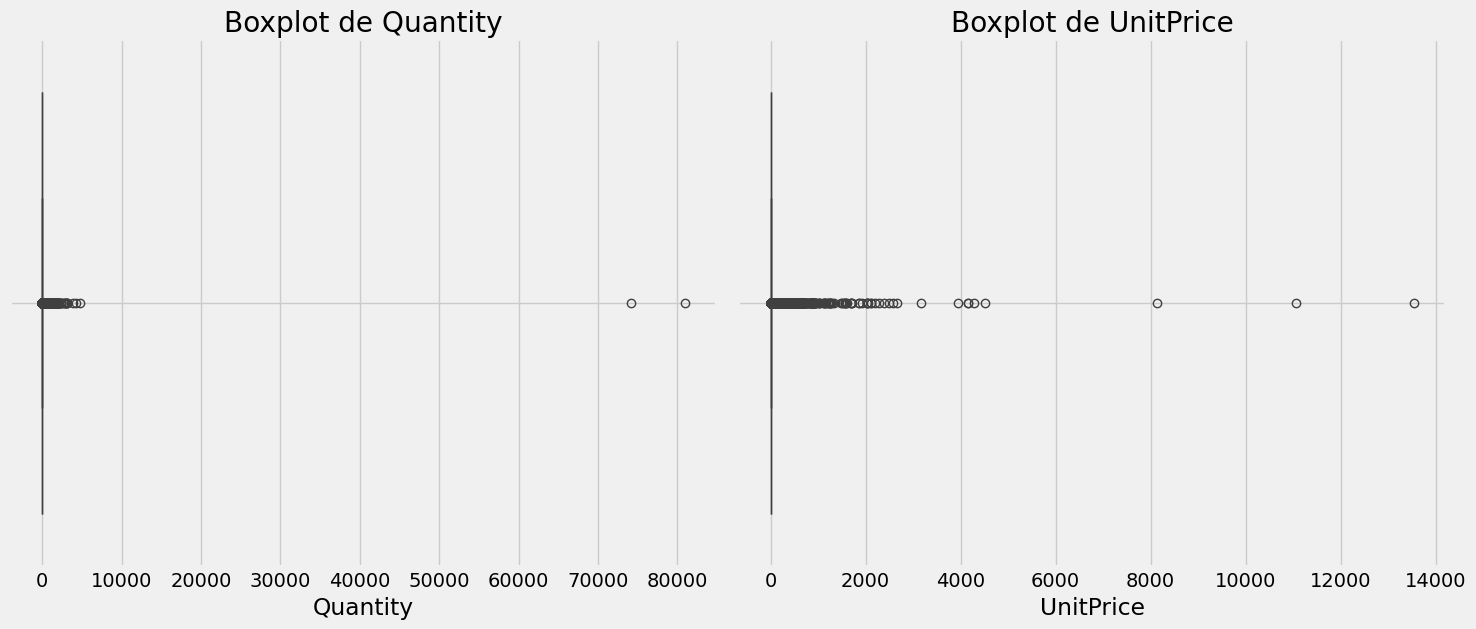

In [ ]:
plt.figure(figsize=(15, 12))
for i, var in enumerate(key_vars):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.grid(True)

plt.tight_layout()
plt.savefig('boxplots_outliers.png')
plt.show()

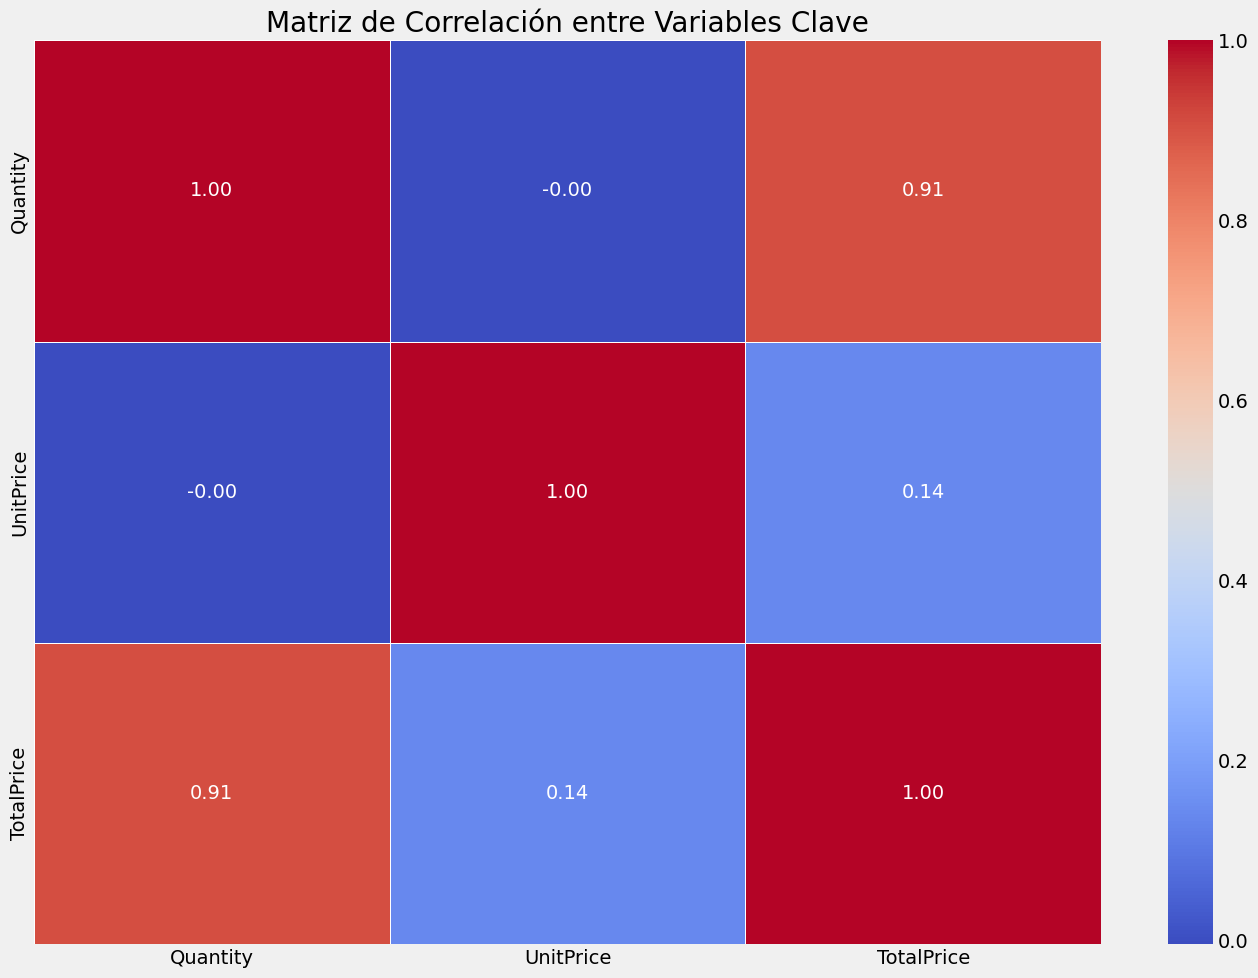

In [ ]:
correlation_vars = ['Quantity', 'UnitPrice', 'TotalPrice']

plt.figure(figsize=(14, 10))
corr_matrix = df[correlation_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Clave')
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
plt.show()

### 3.2 Análisis por fecha y ciudad

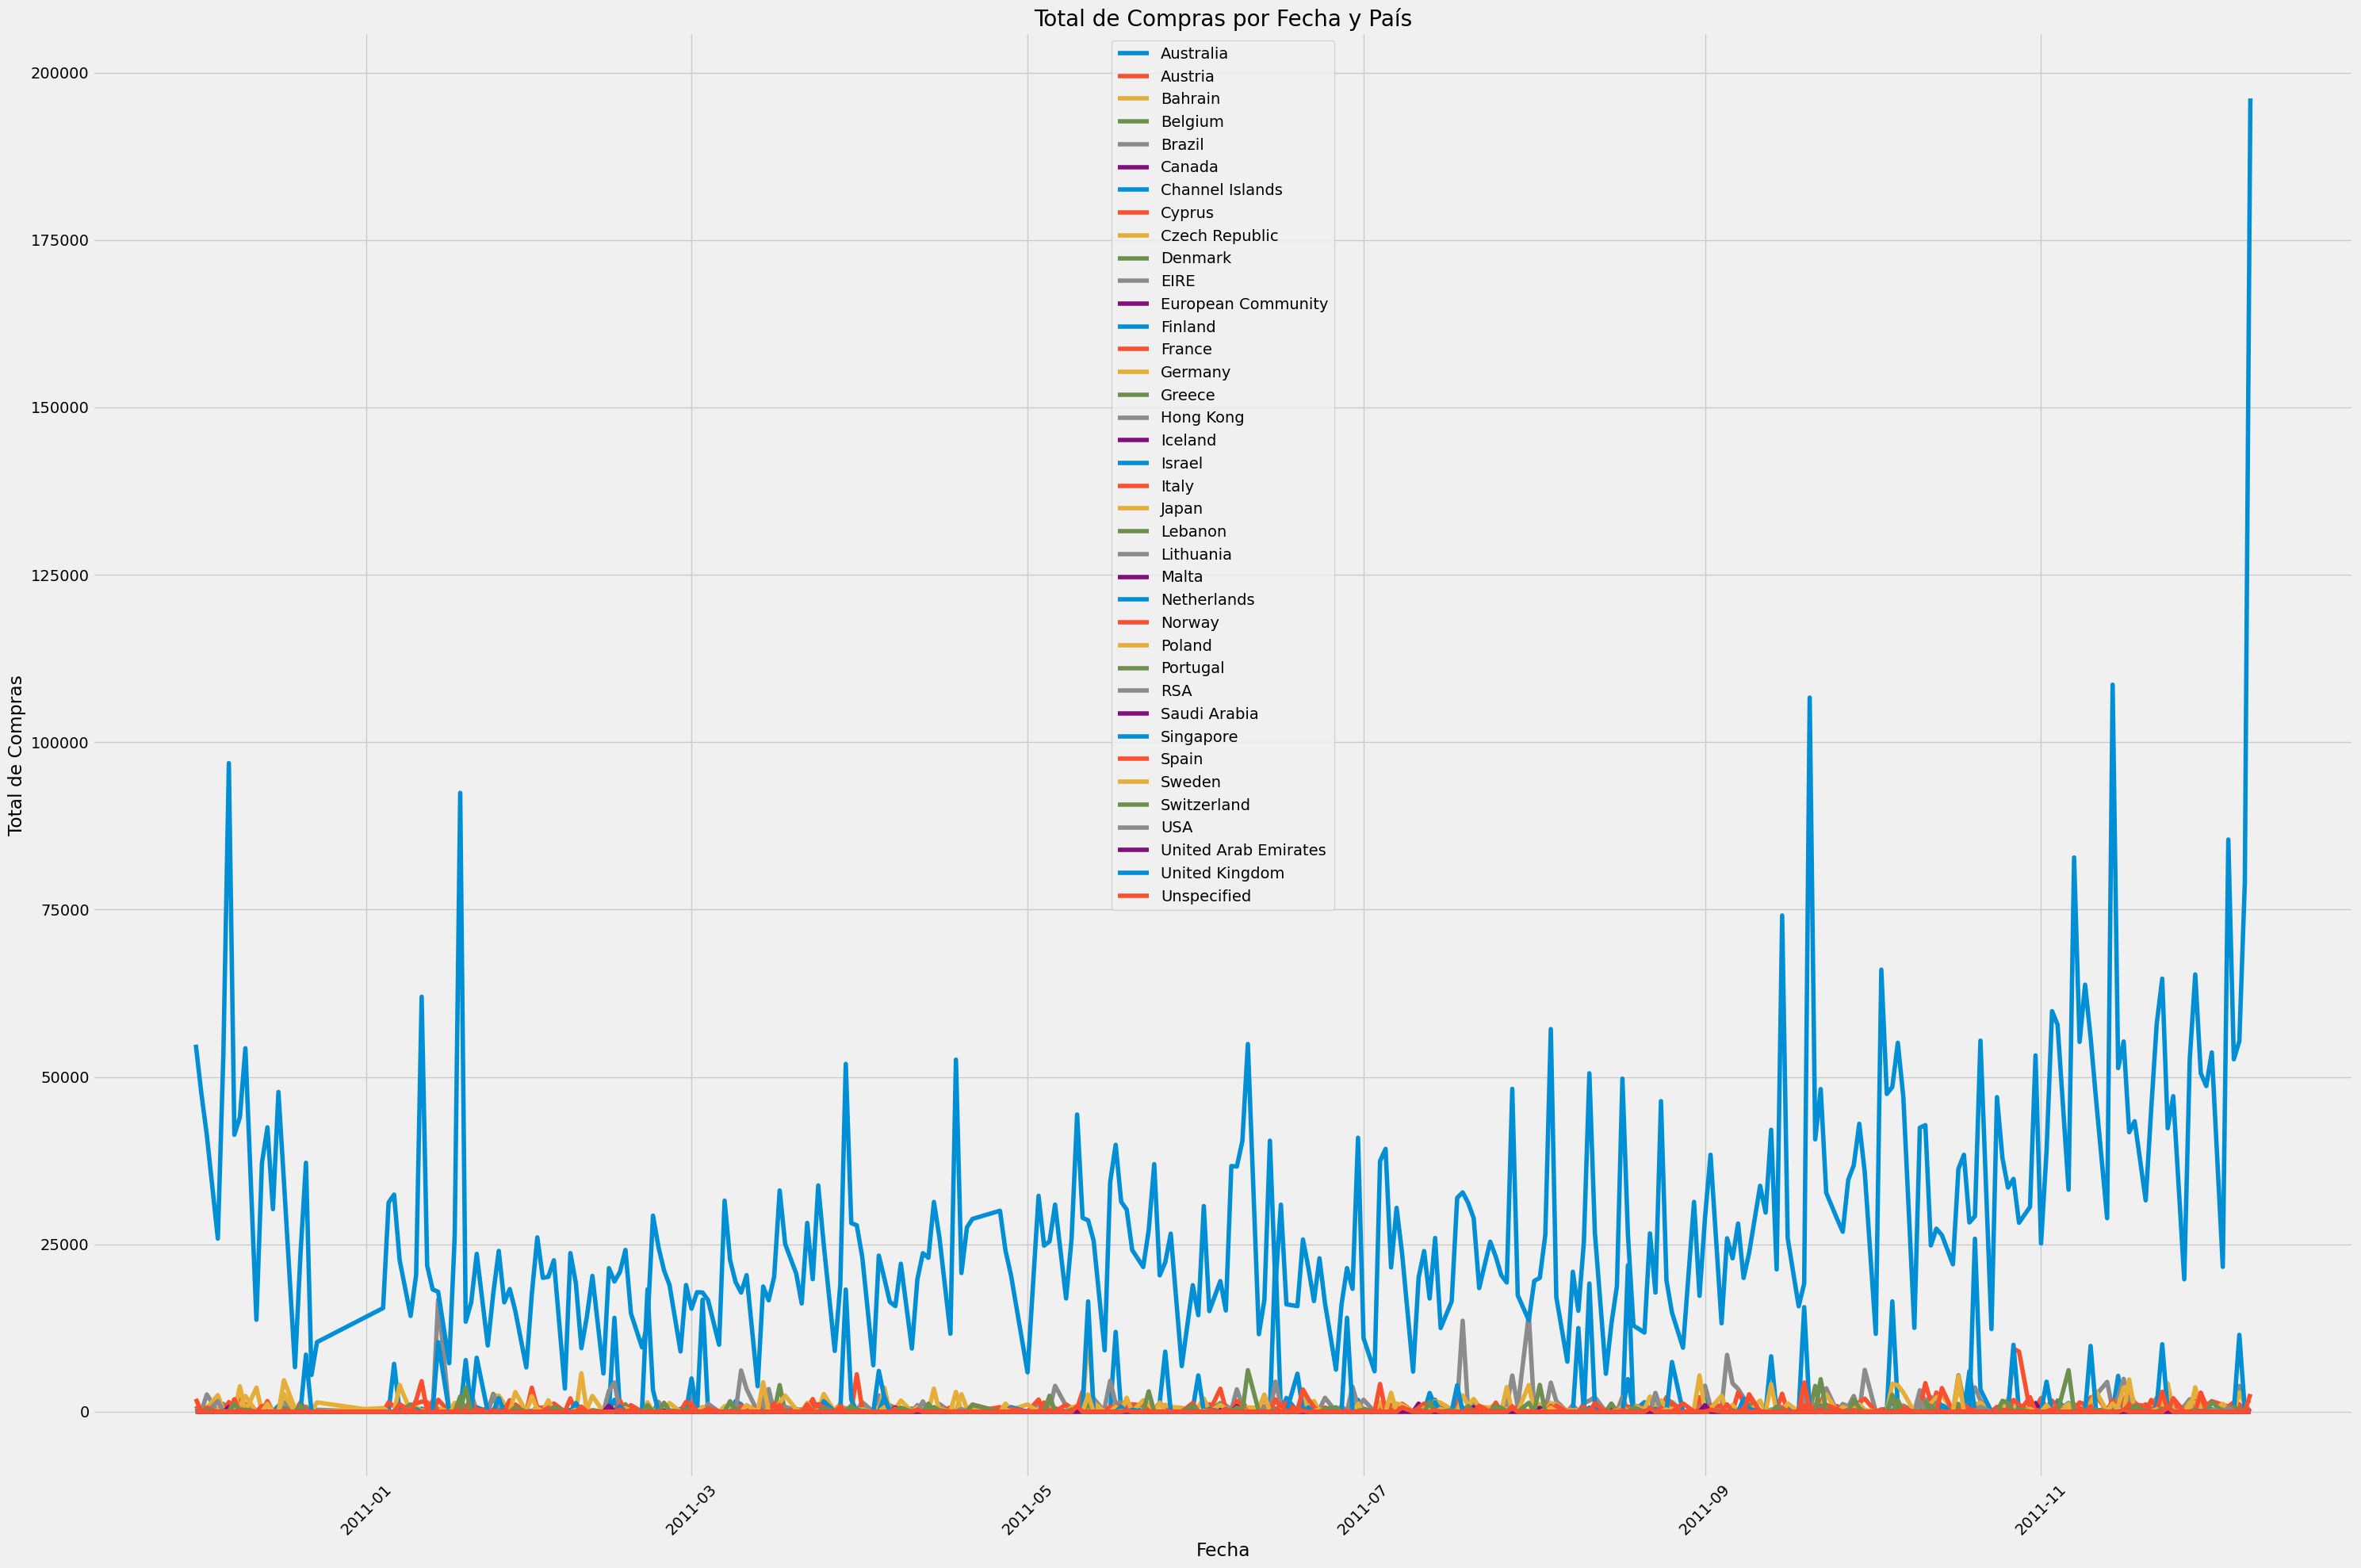

Los 5 países con mayores ventas:
Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalPrice, dtype: float64


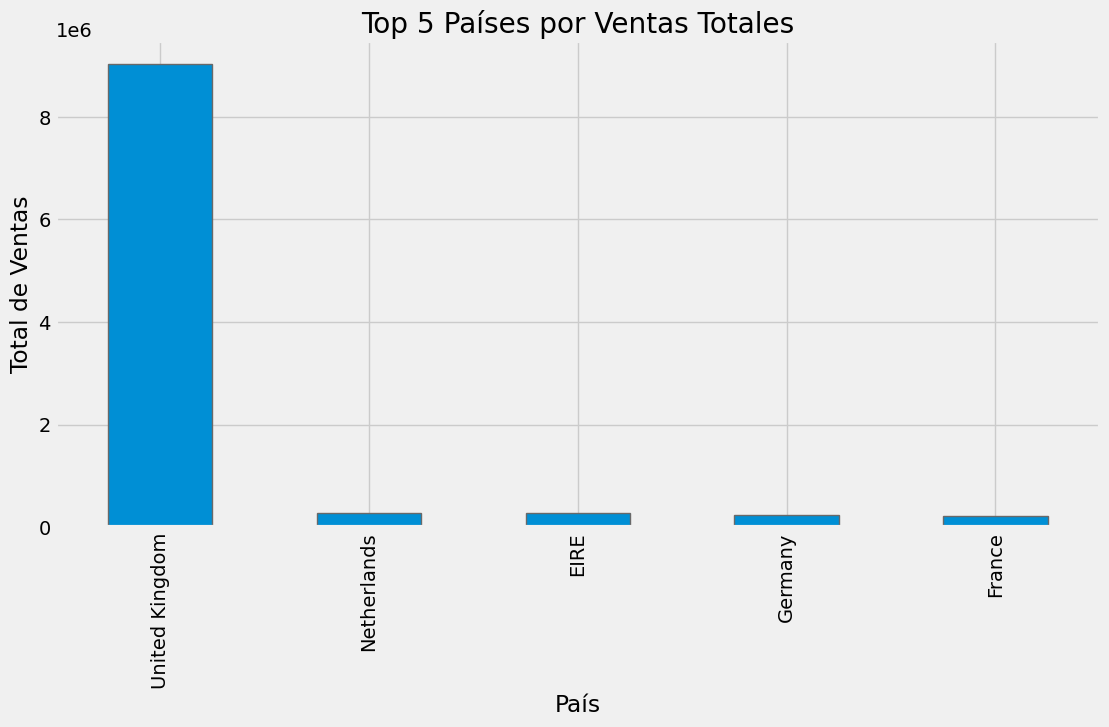

In [ ]:
# Agrupar por fecha y país, y sumar el total de compras
compras_por_fecha_pais = df.groupby(['Date', 'Country'])['TotalPrice'].sum().reset_index()

# Crear un gráfico de líneas para visualizar las compras por fecha y país
plt.figure(figsize=(30, 20))
for pais in compras_por_fecha_pais['Country'].unique():
    data_pais = compras_por_fecha_pais[compras_por_fecha_pais['Country'] == pais]
    plt.plot(data_pais['Date'], data_pais['TotalPrice'], label=pais)

plt.xlabel('Fecha')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Fecha y País')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Análisis adicional: Top N países por ventas
top_n_paises = 5  # Número de países a mostrar
top_paises = df.groupby('Country')['TotalPrice'].sum().nlargest(top_n_paises)
print(f"Los {top_n_paises} países con mayores ventas, en total:")
print(top_paises)

# Gráfico de barras para el top N países
plt.figure(figsize=(12, 6))
top_paises.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Total de Ventas')
plt.title(f'Top {top_n_paises} Países por Ventas Totales')
plt.show()


### 3.3 Análisis de valores atípicos (outliers)


--- Análisis de Valores Atípicos (Outliers) ---

Variable: Quantity
  Límite inferior: -12.50
  Límite superior: 23.50
  Número de outliers: 56363 (10.63% del total)

Variable: UnitPrice
  Límite inferior: -3.07
  Límite superior: 8.45
  Número de outliers: 37999 (7.17% del total)

Variable: TotalPrice
  Límite inferior: -17.18
  Límite superior: 38.63
  Número de outliers: 42651 (8.05% del total)


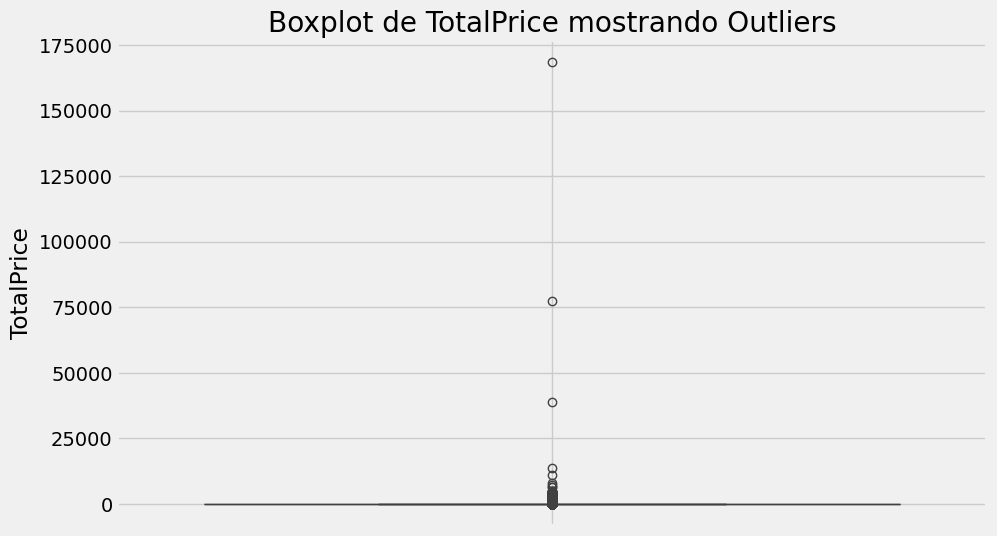

In [ ]:
# Identificación de outliers usando el método de rango intercuartílico (IQR)
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

# Análisis de outliers para variables clave
print("\n--- Análisis de Valores Atípicos (Outliers) ---")
outlier_vars = ['Quantity', 'UnitPrice', 'TotalPrice']

for var in outlier_vars:
    outliers, lower, upper, count = identify_outliers(df, var)
    print(f"\nVariable: {var}")
    print(f"  Límite inferior: {lower:.2f}")
    print(f"  Límite superior: {upper:.2f}")
    print(f"  Número de outliers: {count} ({(count/len(df)*100):.2f}% del total)")

    if count > 0 and count <= 10:  # Si hay pocos outliers, mostrarlos
        print("  Valores extremos:")
        print(outliers[var].sort_values(ascending=False).head())

# Visualización específica para outliers en Income
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['TotalPrice'])
plt.title('Boxplot de TotalPrice mostrando Outliers')
plt.grid(True)
plt.savefig('outliers_TotalPrice.png')
plt.show()

## 4. Conclusiones y hallazgos principales

---



In [ ]:
# =========================================================================
#    EJEMPLO DE CÓDIGO PARA CONCLUSIONES DEL ANÁLISIS EXPLORATORIO
# =========================================================================

print("\n=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===\n")

# 1. PERFIL GENERAL DE LAS TRANSACCIONES
print("1. PERFIL GENERAL DE LAS TRANSACCIONES:")

total_registros = len(df)
fecha_min = df['InvoiceDate'].min()
fecha_max = df['InvoiceDate'].max()
pais_top = df['Country'].value_counts().idxmax()
num_paises = df['Country'].nunique()

print(f"   - Número total de registros: {total_registros}")
print(f"   - Rango de fechas: {fecha_min} a {fecha_max}")
print(f"   - País más frecuente: {pais_top}")
print(f"   - Cantidad de países diferentes: {num_paises}")

# 2. PATRONES DE VENTA
print("\n2. PATRONES DE VENTA:")

# Crea una columna de precio total por línea de factura (si aún no existe)
if 'TotalPrice' not in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

facturas_unicas = df['InvoiceNo'].nunique()
total_cantidad = df['Quantity'].sum()
total_ventas = df['TotalPrice'].sum()
ticket_promedio = total_ventas / facturas_unicas

print(f"   - Cantidad total de facturas: {facturas_unicas}")
print(f"   - Unidades totales vendidas: {total_cantidad}")
print(f"   - Monto total de ventas: £{total_ventas:.2f}")
print(f"   - Ticket promedio por factura: £{ticket_promedio:.2f}")

# 3. COMPORTAMIENTO DE COMPRA
print("\n3. COMPORTAMIENTO DE COMPRA:")

# Productos más vendidos (por cantidad)
productos_top = (
    df.groupby('StockCode')['Quantity']
      .sum()
      .sort_values(ascending=False)
      .head(5)
)

print("   - TOP 5 Productos más vendidos (por 'Quantity'):")
for codigo, cant in productos_top.items():
    print(f"       * StockCode {codigo}: {cant} unidades vendidas")

# Países con más ventas (por total de facturas)
paises_top = df['Country'].value_counts().head(5)
print("\n   - TOP 5 Países con mayor número de registros/facturas:")
for pais, freq in paises_top.items():
    print(f"       * {pais}: {freq} registros")

# 4. IDENTIFICACIÓN DE VALORES ATÍPICOS
print("\n4. IDENTIFICACIÓN DE VALORES ATÍPICOS:")

# Si definiste una función para detectar outliers, úsala aquí; si no, ejemplificamos con IQR:
def identify_outliers_iqr(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

vars_con_outliers = ['Quantity', 'UnitPrice', 'TotalPrice']  # Ajusta según tu EDA
for var in vars_con_outliers:
    num_outliers, lb, ub = identify_outliers_iqr(df, var)
    print(f"   - {var}: {num_outliers} outliers detectados (límite inf = {lb:.2f}, sup = {ub:.2f})")

# 5. DISTRIBUCIÓN DE VARIABLES CLAVE
print("\n5. DISTRIBUCIÓN DE VARIABLES CLAVE:")

def get_mode(series):
    # Retorna la primera moda (puede haber más de una)
    return series.mode().iloc[0]

for var in ['Quantity', 'UnitPrice', 'TotalPrice']:
    skew_val = df[var].skew()
    media = df[var].mean()
    mediana = df[var].median()
    moda = get_mode(df[var]) if not df[var].mode().empty else None

    # Format moda separately to handle potential different data types
    moda_str = f"{moda:.2f}" if moda is not None else "N/A"

    distrib_label = ("simétrica" if abs(skew_val) < 0.5
                     else "sesgada a la derecha" if skew_val > 0
                     else "sesgada a la izquierda")
    print(f"   - {var}:")
    print(f"       * Distribución {distrib_label} (skew = {skew_val:.2f})")
    print(f"       * Media: {media:.2f}, Mediana: {mediana:.2f}, Moda: {moda_str}")  # Use formatted moda_str

# 6. SEGMENTOS O AGRUPACIONES DE CLIENTES (Opcional)
print("\n6. SEGMENTOS O AGRUPACIONES DE CLIENTES (OPCIONAL):")

# Aquí podrías mostrar un ejemplo de segmentación por país, por montos, etc.
# Suponiendo creaste una columna 'SpendingCategory' (ej: Alto, Medio, Bajo):
if 'SpendingCategory' in df.columns:
    for segmento in df['SpendingCategory'].unique():
        seg_df = df[df['SpendingCategory'] == segmento]
        print(f"   - Segmento {segmento}: {len(seg_df)} registros")
        print(f"       Monto total: £{seg_df['TotalPrice'].sum():.2f}")
        print(f"       Ticket promedio: £{(seg_df['TotalPrice'].sum()/seg_df['InvoiceNo'].nunique()):.2f}")
else:
    print("   (No se definió la columna 'SpendingCategory' para segmentar)")

# 7. RECOMENDACIONES FINALES
print("\n7. RECOMENDACIONES O CONCLUSIONES FINALES:")
print("-------------------------------------------")
print("   - Podemos ver que con mucha diferencia el pais con mas compras es United Kingdom, con un total de 412.332 compras en el año 2021")
print("   - El producto mas vendido en el año 2021 es (WHITE HANGING HEART T-LIGHT HOLDER), con un total de 1.976 vendidos en ese año. Sobre los 1.857 unidades vendidas de JUMBO BAG RED RETROSPOT en el año 2021")
print("   - El comportamiento de las compras no sigue un patron estable, pero se puede observar que en el mes de enero y diciembre se encuentran las mayores cantidades de compras.")
print("-------------------------------------------")
print("   - Existen outliers en 'Quantity' y 'UnitPrice' que pueden distorsionar la media.")
print("   - Es útil investigar por qué hay facturas con valores negativos en 'Quantity' (devoluciones).")
print("   - Incluir un análisis de correlación con el tiempo (estacionalidad) y el comportamiento por cliente.")
print("   - Se recomienda preprocesar o filtrar outliers si se van a construir modelos de Machine Learning.")


=== CONCLUSIONES Y HALLAZGOS PRINCIPALES ===

1. PERFIL GENERAL DE LAS TRANSACCIONES:
   - Número total de registros: 530104
   - Rango de fechas: 2010-12-01 08:26:00 a 2011-12-09 12:50:00
   - País más frecuente: United Kingdom
   - Cantidad de países diferentes: 38

2. PATRONES DE VENTA:
   - Cantidad total de facturas: 19960
   - Unidades totales vendidas: 5588376
   - Monto total de ventas: £10666684.54
   - Ticket promedio por factura: £534.40

3. COMPORTAMIENTO DE COMPRA:
   - TOP 5 Productos más vendidos (por 'Quantity'):
       * StockCode 23843: 80995 unidades vendidas
       * StockCode 23166: 78033 unidades vendidas
       * StockCode 22197: 56921 unidades vendidas
       * StockCode 84077: 55047 unidades vendidas
       * StockCode 85099B: 48474 unidades vendidas

   - TOP 5 Países con mayor número de registros/facturas:
       * United Kingdom: 485123 registros
       * Germany: 9040 registros
       * France: 8407 registros
       * EIRE: 7890 registros
       * Spain: 2